In [1]:
#importing required packages
#step1 defining data 
import pandas
import numpy 
import sklearn
import seaborn
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#creating DataFrame
#step 2: Data collecion
BlackFriday_frame = pandas.read_csv('F:\BlackFriday.csv')
BlackFriday_frame.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
5,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
6,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854
7,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686
8,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871
9,1000005,P00251242,M,26-35,20,A,1,1,5,11.0,NaN,5254


In [3]:
#dropping unwanted data 
data = BlackFriday_frame.drop(['User_ID','Occupation','Stay_In_Current_City_Years','Marital_Status'],axis = 1)
data.isnull().sum()

Product_ID              0
Gender                  0
Age                     0
City_Category           0
Product_Category_1      0
Product_Category_2    298
Product_Category_3    678
Purchase                0
dtype: int64

In [4]:
#filling Nan data 
for i in ['Product_Category_2','Product_Category_3']:
    exec("data.%s.fillna(data.%s.value_counts().idxmax(), inplace=True)" %(i,i))

In [5]:
data.isnull().sum()

Product_ID            0
Gender                0
Age                   0
City_Category         0
Product_Category_1    0
Product_Category_2    0
Product_Category_3    0
Purchase              0
dtype: int64

In [6]:
LE = LabelEncoder()

In [7]:
data = data.apply(LE.fit_transform)
data.head(5)

,Product_ID,Gender,Age,City_Category,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,140,0,0,0,2,6,12,480
1,477,0,0,0,0,4,10,724
2,167,0,0,0,10,6,12,16
3,159,0,0,0,10,12,12,12
4,384,1,2,0,0,0,12,729


In [8]:
data.Gender = pandas.to_numeric(data.Gender)
data.Age = pandas.to_numeric(data.Age)
data.City_Category = pandas.to_numeric(data.City_Category)
data.Product_Category_1 = pandas.to_numeric(data.Product_Category_1)
data.Product_Category_2 = pandas.to_numeric(data.Product_Category_2)
data.Product_Category_3 = pandas.to_numeric(data.Product_Category_3)

In [9]:
Bfriday_data_x = data[['Product_ID','Gender','City_Category','Product_Category_1','Product_Category_2','Product_Category_3']]
Bfriday_data_y = data[['Purchase']]

In [10]:
#finding co-relation 
corr = data.corr()
print (corr['Purchase'].sort_values(ascending=False)[:10], '\n')
print (corr['Purchase'].sort_values(ascending=False)[-10:])

Purchase              1.000000
City_Category         0.075906
Gender                0.055498
Age                  -0.009903
Product_ID           -0.088289
Product_Category_2   -0.112573
Product_Category_3   -0.189807
Product_Category_1   -0.386427
Name: Purchase, dtype: float64 

Purchase              1.000000
City_Category         0.075906
Gender                0.055498
Age                  -0.009903
Product_ID           -0.088289
Product_Category_2   -0.112573
Product_Category_3   -0.189807
Product_Category_1   -0.386427
Name: Purchase, dtype: float64


In [11]:
X_train, X_test, y_train, y_test = train_test_split(Bfriday_data_x, Bfriday_data_y, test_size=0.3)

In [12]:
from sklearn.tree import DecisionTreeRegressor

In [13]:
#from sklearn.ensemble import RandomForestRegressor

In [14]:
dtr = DecisionTreeRegressor()
#rfr = RandomForestRegressor()

In [15]:
#Here we fit training data to Decision Tree Regressor
fit2 = dtr.fit(X_train,y_train)
#Here we fit training data to Random Forest Regressor
#fit3 = rfr.fit(X_train,y_train)

In [16]:
print("Accuracy Score of Decision Tree on train set",fit2.score(X_train,y_train)*100)
#print("Accuracy Score of Random Forests on train set",fit3.score(X_train,y_train)*100)

Accuracy Score of Decision Tree on train set 98.18836483153736


In [17]:
#prediction for Decision Tree forest 
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

#prediction for Random forest 
#rff = RandomForestRegressor()
#rff = rff.fit(X_train,y_train)
#y_pred1 = clf.predict(X_test)



(array([32., 31., 39., 33., 24., 22., 32., 25., 34., 28.]),
 array([  0. ,  92.7, 185.4, 278.1, 370.8, 463.5, 556.2, 648.9, 741.6,
        834.3, 927. ]),
 <a list of 10 Patch objects>)

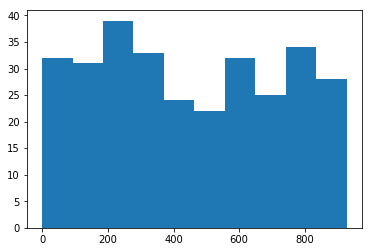

In [18]:
#Visualization 
plt.hist(y_pred)

{'whiskers': [<matplotlib.lines.Line2D at 0x8ea72078d0>,
 'caps': [<matplotlib.lines.Line2D at 0x8ea72141d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x8ea7207780>],
 'medians': [<matplotlib.lines.Line2D at 0x8ea7214a20>],
 'fliers': [<matplotlib.lines.Line2D at 0x8ea7214e48>],
 'means': []}

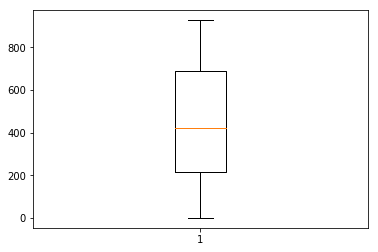

In [19]:
plt.boxplot(y_pred)

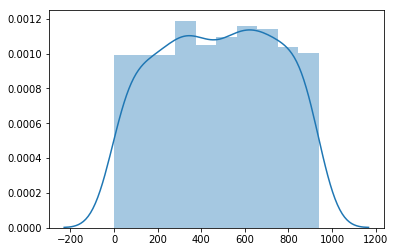

In [20]:
seaborn.distplot(y_train)

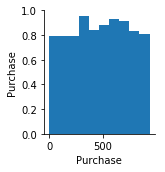

In [21]:
seaborn.pairplot(y_train)

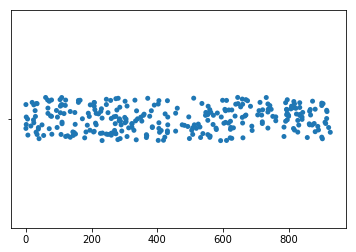

In [22]:
seaborn.stripplot(y_pred,jitter=True)

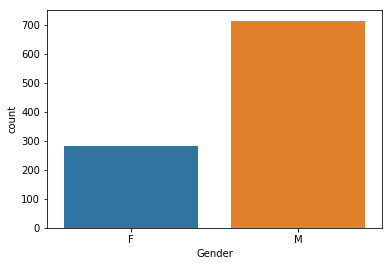

In [23]:
seaborn.countplot(BlackFriday_frame.Gender)

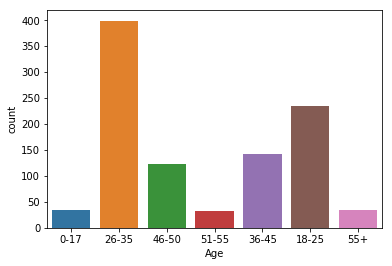

In [24]:
seaborn.countplot(BlackFriday_frame.Age)

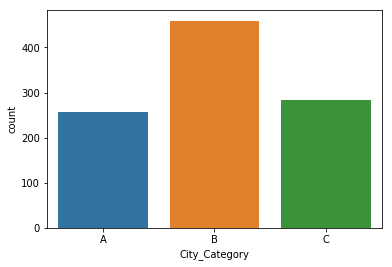

In [25]:
seaborn.countplot(BlackFriday_frame.City_Category)

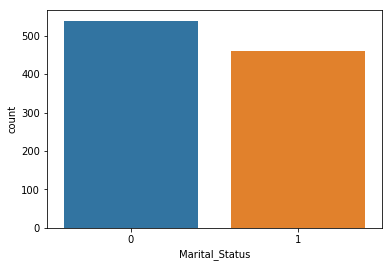

In [26]:
seaborn.countplot(BlackFriday_frame.Marital_Status)

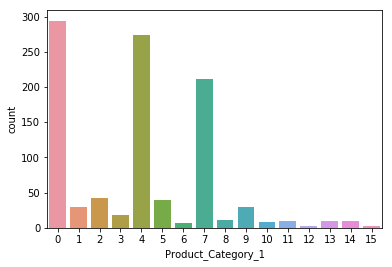

In [27]:
seaborn.countplot(data.Product_Category_1)

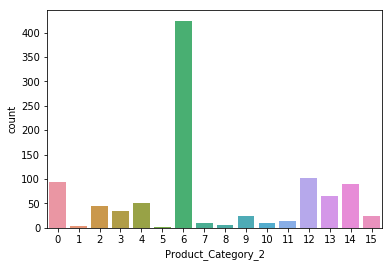

In [28]:
seaborn.countplot(data.Product_Category_2)

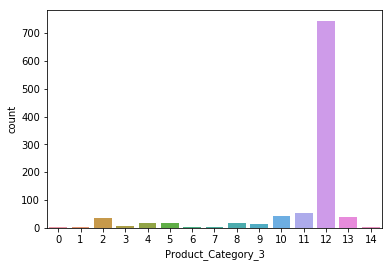

In [29]:
seaborn.countplot(data.Product_Category_3)